## 1) Importing All Modules

In [1]:
import numpy as np
from scipy.linalg import svd
from numpy.linalg import matrix_rank
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20 ### Setting the Fixed Size of thr Windows


### A kernel is seperable if rank of the filter is 1 (outer product of 2 vectors) . that is we can convert a 2-dimensional filter to 2 seperate 1-dimensional filter . lets prove this by following , we know that Sobel, Average and Gaussian Filters are Seperable so lets check their ranks first

### Checking the Rank of Sobel Operator , we see we get rank 1 , which means its seperable 

In [2]:
SobelOperator = np.array([[-1,0,1], [-2, 0, 2], [-1, 0, 1]])
print(matrix_rank(SobelOperator))

1


### Check the Rank of Averaging Filter , which we see is also 1  , and we know Averaging filter is seperable

In [3]:
Averaging =np.ones((5,5),np.float32)/25
print(matrix_rank(SobelOperator))

1


### Gaussian Filter Rank, which is seperable also get Rank 1 

In [4]:
x, y = np.meshgrid(np.linspace(-1, 1, 500), np.linspace(-1, 1, 500)) ### We generate 500 number between -1 and 1, for both x and y 

gauss = np.exp(-5 * (x * x + y * y))

print(matrix_rank(gauss))


ISGaussianSeperable=matrix_rank(gauss)==1


AddString0=""
if(not ISGaussianSeperable):
	AddString0="Not "

1


###  Now we define Circle And Eclpise kernel , and if there rank is 1 , we say that they are seperable , if not then they are not seperable
## Circle


In [5]:
circle = np.array(x*x+y*y < 0.8, dtype='float64') ### Generating Circle using the Equation of circle
ISCircleSeperable=matrix_rank(circle)==1


AddString1=""
if(not ISCircleSeperable):
	AddString1="Not "


### Eclpise

In [6]:
Eclipse = np.array((x*x)/4+(y*y)/1 < 0.2, dtype='float64') ### Generating Eclipse using the Equation of circle
ISEclipseSeperable=matrix_rank(Eclipse)==1


AddString2=""
if(not ISEclipseSeperable):
	AddString2="Not "

#### Now that we have Written code for the Generating a Circle and Eclipse filter, lets visualize them first, and then investiage if they were seperable , based on the fact seperable filters have rank 1, else they are not seperable

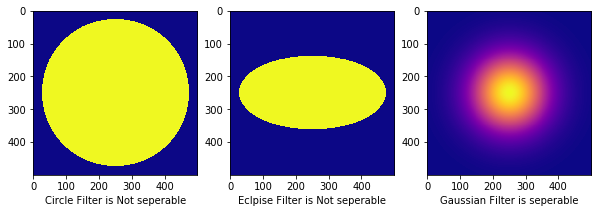

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]


plt.subplot(1,3,1)
plt.imshow(circle, cmap='plasma')
plt.xlabel('Circle Filter is '+ AddString1 +"seperable")

plt.subplot(1,3,2)
plt.imshow(Eclipse, cmap='plasma')
plt.xlabel('Eclpise Filter is '+ AddString1 +"seperable")

plt.subplot(1,3,3)
plt.imshow(gauss, cmap='plasma')
plt.xlabel('Gaussian Filter is '+ AddString0 +"seperable")


plt.show()